# Deep Learning using tf.keras

**Deep learning** is a subset of machine learning, which is essentially a neural network with three or more layers. <br>

While a neural network with a single layer can still make approximate predictions, additional hidden layers can help to optimize and refine for accuracy.<br>

Deep learning drives many artificial intelligence (AI) applications and services that improve automation, performing analytical and physical tasks without human intervention (digital assistants, voice-enabled TV remotes, credit card fraud detection, ...) as well as emerging technologies (such as self-driving cars).<br>

Deep neural networks consist of multiple layers of interconnected nodes, each building upon the previous layer to refine and optimize the prediction or categorization. <br>

This progression of computations through the network is called **forward propagation**. <br>
The input and output layers of a deep neural network are called visible layers. The **input layer** is where the deep learning model ingests the data for processing, and the **output layer** is where the final prediction or classification is made.

Another process called **backpropagation** uses algorithms, like gradient descent, to calculate errors in predictions and then adjusts the weights and biases of the function by moving backwards through the layers in an effort to train the model. <br>

Together, forward propagation and backpropagation allow a neural network to make predictions and correct for any errors accordingly. Over time, the algorithm becomes gradually more accurate.<br>

The above describes the simplest type of deep neural network in the simplest terms. However, deep learning algorithms can be very complex, and there are different types of neural networks to address specific problems or datasets. <br>
For example:

- **Convolutional neural networks** (CNNs), used primarily in computer vision and image classification applications, can detect features and patterns within an image, enabling tasks, like object detection or recognition. In 2015, a CNN bested a human in an object recognition challenge for the first time.<br>
- **Recurrent neural network** (RNNs) typically used in natural language and speech recognition applications as it leverages sequential or times series data.

## Keras and TensorFlow

**Keras** is an open-source deep learning library (project started in 2015) written in Python.<br>

Created by the Google Brain team, **TensorFlow** is an open source library (project also started in 2015) for numerical computation and large-scale machine learning. <br>
TensorFlow bundles together a slew of machine learning and deep learning models and algorithms and makes them useful by way of a common metaphor. <br>
It uses Python to provide a convenient front-end API for building applications with the framework, while executing those applications in high-performance C++.<br>

During the period of 2015-2019, developing deep learning models using `TensorFlow` (but also `Theano`, or `PyTorch`) was cumbersome, requiring tens or even hundreds of lines of code to achieve the simplest tasks. <br>
The focus of these libraries was on flexibility, and speed, not ease of use.<br>

`Keras` is popular because the API is clean and simple, allowing standard deep learning models to be defined, fit, and evaluated in just a few lines of code.

`Keras` gives the possibility to use several popular deep learning mathematical libraries as the backend (to perform the computation), such as TensorFlow, Theano, or CNTK. This allowed the power of these libraries to be harnessed (e.g. GPUs) with a very clean and simple interface.<br>

In 2019, Google released a new version of their TensorFlow deep learning library (**TensorFlow 2**) that integrated the Keras API directly and promoted this interface as the default or standard interface for deep learning development on the platform.<br>

This integration is commonly referred to as the **tf.keras** interface or API.

Given that TensorFlow is now the de facto standard backend for the Keras open source project, the integration means that a single library can now be used instead of two separate ones. <br>

**Note**: you can install tensorflow using the traditionnal commands (`pip install tensorflow` or `conda install tensorflow`) and check it's version via: `tensorflow.__version__`

This notebook will give you an overview of how to define a deep learning model using the **tf.keras** API.

### The Keras Model Life-Cycle

A **Keras** model has a life-cycle, similar to other models, composed of 5 steps:

1. **Define the model**: defining the model requires that you first select the type of model that you need and then choose the architecture or network topology.<br> From an API perspective, this involves defining the **layers** of the model, configuring each layer with a **number of nodes** and **activation function**, and connecting the layers together into a cohesive model.<br> Models can be defined either with the **Sequential API** or the **Functional API**.<br>
2. **Compile the model**: compiling the model requires that you first select a **loss** function that you want to optimize, such as `mean squared error` or `cross-entropy`.<br>It also requires that you select an algorithm to perform the **optimization procedure**, typically `stochastic gradient descent`, or a modern variation, such as `Adam`. <br>It may also require that you select any **performance metrics** to keep track of during the model training process.
3. **Fit the model**: fitting the model requires that you first select the training configuration, such as the number of **epochs** (loops through the training dataset) and the **batch size** (number of samples in an epoch used to estimate model error).<br> Training applies the chosen optimization algorithm to minimize the chosen **loss** function and updates the model using the backpropagation of error algorithm.<br> Fitting the model is the slow part of the whole process and can take seconds to hours to days, depending on the complexity of the model, the hardware you’re using, and the size of the training dataset.
4. **Evaluate the model**: evaluating the model requires that you first choose a holdout dataset used to evaluate the model. <br>This should be data not used in the training process so that we can get an unbiased estimate of the performance of the model when making predictions on new data.<br>
5. **Make predictions**: making a prediction is the final step (and goal) in the life-cycle. <br>It requires you have new data for which a prediction (a class label probability, a numerical value, ...) is required.<br>You may want to save the model and later load it to make predictions. <br>



### The Sequential Model API 

The **sequential model API** is the simplest API.<br>

It is referred to as "sequential" because it involves defining a **Sequential** class and adding layers to the model one by one in a linear manner, from input to output.<br>

The example below defines a Sequential MLP model used for a classification problem. It accepts 4 inputs, has 2 hidden layers with 10 nodes and 8 nodes and then an output layer with 3 nodes (1 per class).<br>

The input layer is created implicitly: it's size is defined by the **input_shape** argument on the first hidden layer. <br>
That means in the following example, the model expects the input for one sample to be a vector of 4 numbers.

The sequential API is easy to use: you keep calling **model.add()** until you have added all of your layers.

`
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(4,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
`

### The Functional Model API 

The **Functional API** is more complex but is also more flexible.

It involves explicitly connecting the output of one layer to the input of another layer. <br>

Each connection is specified.<br>

First, an input layer must be defined via the **Input** class, and the shape of an input sample is specified.<br>

We must retain a reference to the input layer when defining the model:

`l_in = Input(shape=(4,))`

Next, a fully connected layer can be connected to the input by calling the layer and passing the input layer. This will return a reference to the output connection in this new layer:

`l_hidden1 = Dense(10)(l_in)`

We can then connect this to another hidden layer in the same manner:

`l_hidden2 = Dense(8)(l_hidden1)`

We can then connect this to an output layer:

`l_out = Dense(1)(l_hidden1)`


Once connected, we define a **Model** object and specify the input and output layers: 

`model = Model(inputs=l_in, outputs=l_out)`

As such, it allows for more complicated model designs, such as models that may have multiple input paths (separate vectors) and models that have multiple output paths.

`
l_in = Input(shape=(n_features,))
l_hidden1 = Dense(10,activation='relu', kernel_initializer='he_normal')(l_in)
l_hidden2 = Dense(8,activation='relu', kernel_initializer='he_normal')(l_hidden1)
l_out = Dense(3, activation='softmax')(l_hidden2)
model = Model(inputs=l_in, outputs=l_out)
`

## Multilayer Perceptron Models

A **Multilayer Perceptron model**, or **MLP** for short, is a standard fully connected neural network model.<br>

It is comprised of layers of nodes where each node is connected to all outputs from the previous layer and the output of each node is connected to all inputs for nodes in the next layer.<br>

An MLP is created by with one or more `Dense` layers. <br>

This model is appropriate for tabular data (data as it looks in a table or spreadsheet) with one column for each variable and one row for each observation. <br>

There are three predictive modeling problems you may want to explore with an MLP:
1. **`binary classification`**: 
1 or 2 or 3 hidden layer could be used (1 is enough usually).
In this situation, it is a good practice to use **relu** activation with a **he_normal** weight initialization for the hidden layer(s).<br> 
The output layer will be composed of a single node.
The output layer could use the **sigmoid** activation function. <br>
The model can be optimized using the **adam** version of stochastic gradient descent and it could seeks to minimize the **cross-entropy** loss.<br>

2. **`multiclass classification`**:
1 or 2 or 3 hidden layer could be used (1 is enough usually).<br>
In this situation also, it is a good practice to use **relu** activation with a **he_normal** weight initialization for the hidden layer(s).<br> 
The output layer will be composed of one node for each class and it will use the **softmax** activation function.<br>
Given that it is a multiclass classification, the loss function `sparse_categorical_crossentropy`, could be used (it is appropriate for integer encoded class labels: 0 for one class, 1 for the next class, etc.).

3. **`regression`**:
1 or 2 or 3 hidden layer could be used (1 is enough usually).<br>
In this situation also, it is a good practice to use **relu** activation with a **he_normal** weight initialization for the hidden layer(s).<br> 
A regression problem usually involves predicting a single numerical value. As such, the output layer has a single node and uses the default or **linear** activation function (no activation function).<br> 
The **mean squared error** (**mse**) loss can be used to minimized when fitting the model (being a regression, not a classification, we cannot calculate classification accuracy).

### How many layers, how many nodes

Every neural network is composed (at the maximum) of three types of layers: **input**, **hidden**, and **output**.<br>

Creating the NN architecture therefore means coming up with values for the number of layers of each type and the number of nodes in each of these layers.<br>

#### The Input Layer

Every NN has exactly one **input layer**.<br>

With respect to the number of neurons comprising this layer, this parameter is completely and uniquely determined once you know the shape of your training data: the number of neurons comprising that layer is equal to the number of features in your data. <br>

Some NN configurations add one additional node for a **bias** term.

#### The Output Layer

Like the Input layer, every NN has exactly one **output layer**. <br> 

The size of the output layer is completely determined by the chosen model configuration.<br>

Is the NN used for classification or regression ? <br>

If the NN is a regressor, then the output layer has a single node.<br>

If the NN is a classifier, then it also has a single node unless the activation `softmax` function is used in which case the output layer has one node per class label in your model.

#### The Hidden Layers


How many hidden layers? <br>

Well if your data is linearly separable then you don't need any hidden layers at all (you don't even need an NN to resolve your data either, but it will still do the job).<br>

Beyond that, it is difficult to determine, in advance, how many hidden layers are needed.<br>
Nevertheless there is a consensus: adding additional hidden layers decrease the performance of the model. <br>

One hidden layer is sufficient for the large majority of problems.<br>

What about the size of the hidden layer(s)?<br>

There are some empirically-derived rules-of-thumb, of these, the most commonly relied on is 'the optimal size of the hidden layer is usually between the size of the input and size of the output layers'. <br>
One could probably get decent performance bychoosing a number of hidden layers equals one and a number of neurons in that layer computed as the mean of the neurons in the input and output layers.<br>

Problems that require two hidden layers are rarely encountered. However, neural networks with two hidden layers can represent functions with any kind of shape.<br>

There is no way to select automatically the number of layers and neurons in each layer, but there are networks that can build automatically their topology, like **EANN** (Evolutionary Artificial Neural Networks, which use Genetic Algorithms to evolved the topology).<br>

If we except this last kind of NN, the best strategy to find the proper number of hidden layers is an empirical one: split your data into training, cross validation, and test sets, and train neural networks with 1, 2, and 3 hidden layers, then see which one has the lowest cross validation error to choose an architecture.

### Activation Functions

An **activation function** in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.<br>

The choice of activation function has a large impact on the capability and performance of the neural network, and <u>different activation functions may be used in different parts of the model</u>.<br>

Technically, the activation function is used within or after the internal processing of each node in the network, although networks are designed to use the <u>same activation function for all nodes in a layer</u>.<br>

<u>All hidden layers typically use the same activation function</u>. <br>

The output layer will typically use a different activation function from the hidden layers and is dependent upon the type of prediction required by the model.<br>

Activation functions are also typically differentiable, meaning the first-order derivative can be calculated for a given input value. This is required given that neural networks are typically trained using the backpropagation of error algorithm that requires the derivative of prediction error in order to update the weights of the model.<br>

There are many different types of activation functions used in neural networks, although perhaps only a small number of functions used in practice for hidden and output layers.<br>

Typically, <u>a differentiable nonlinear activation function is used in the hidden layers</u> of a neural network. This allows the model to learn more complex functions than a network trained using a linear activation function.<br>

#### Activation function for hidden layers

There are perhaps three activation functions you may want to consider for use in hidden layers; they are:

1. Rectified Linear Activation (ReLU)
2. Logistic (Sigmoid)
3. Hyperbolic Tangent (Tanh)

##### ReLU 

**ReLU** activation function, is perhaps the most common function used for hidden layers.

It is common because it is both simple to implement and effective at overcoming the limitations of other previously popular activation functions, such as `Sigmoid` and `Tanh`. Specifically, it is less susceptible to vanishing gradients that prevent deep models from being trained.

The ReLU function is calculated as follows: if the input value is negative, then a value 0.0 is returned, otherwise, the value is returned.

When using the ReLU function for hidden layers, it is a good practice to use a **He Normal** or **He Uniform** weight initialization and <u>scale input data to the range 0-1</u> (normalize) prior to training.<br>

##### Sigmoid

The **sigmoid** activation function is also called the logistic function. It is the same function used in the logistic regression classification algorithm.<br>

The function takes any real value as input and outputs values in the range 0 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0.<br>

The sigmoid activation function is calculated as follows: 1.0 / (1.0 + e^-x)<br>

When using the Sigmoid function for hidden layers, it is a good practice to use a **Xavier Normal** or **Xavier Uniform** weight initialization (also referred to Glorot initialization) and <u>scale input data to the range 0-1</u> prior to training.

##### Tanh 

The **Tanh** (hyperbolic tangent) activation function is very similar to the sigmoid activation function.<br>

The function takes any real value as input and outputs values in the range -1 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to -1.0.<br>

The Tanh activation function is calculated as follows: (e^x – e^-x) / (e^x + e^-x)<br>

When using the Tanh function for hidden layers, it is a good practice to use a **Xavier Normal** or **Xavier Uniform** weight initialization and <u>scale input data to the range -1 - +1</u> prior to training.<br>

Both the `sigmoid` and `Tanh` functions can make the model more susceptible to problems during training, via the so-called vanishing gradients problem.<br>

Modern neural network models with common architectures, such as MLP and CNN, will make use of the ReLU activation function, or extensions.<br>

Recurrent networks still commonly use Tanh or sigmoid activation functions, or even both.<br> 

#### Activation for Output Layers

The most commonly used activation functions for use in the output layer are:

1. Linear
2. Logistic (Sigmoid)
3. Softmax

##### Linear Output Activation Function

The **linear activation** function (also called **identity**) does not change the weighted sum of the input in any way and instead returns the value directly.<br>

Target values used to train a model with a linear activation function in the output layer are typically scaled prior to modeling using normalization or standardization transforms.<br>

If your problem is a regression problem, you should use a linear activation function.<br>


##### Sigmoid Output Activation Function

Target labels used to train a model with a **sigmoid** activation function in the output layer will have the values 0 or 1.<br>

If your problem is a classification problem with two mutually exclusive classes (binary classification), then your output layer will have one node and a `sigmoid` activation function should be used.<br>

If there are two or more mutually inclusive classes (multilabel classification), then your output layer will have one node for each class and a `sigmoid` activation function should be used.

##### Softmax Output Activation Function

The **softmax** function outputs a vector of values that sum to 1.0 and that can be interpreted as probabilities of class membership.<br>

Target labels used to train a model with the `softmax` activation function in the output layer will be vectors with 1 for the target class and 0 for all other classes.<br>

If your problem is a classification problem with more than two mutually exclusive classes (multiclass classification), then your output layer will have one node per class and a softmax activation should be used. <br

### Which Optimizer, error function and metrics should I use?

#### Optimizer

Choosing a good optimizer for your machine learning project can be overwhelming. Popular deep learning libraries such as `PyTorch` or `TensorFLow` offer a broad selection of different optimizers — each with its own strengths and weaknesses.<br>

The problem with choosing an optimizer is that there is no single optimizer to rule them all.<br>

Almost all popular optimizers in deep learning are based on **gradient descent**. This means that they repeatedly estimate the slope of a given loss function and move the parameters in the opposite direction (hence climbing down towards a supposed global minimum). <br>
The most simple example for such an optimizer is probably **stochastic gradient descent** (or **SGD**) which exists since the 1950s.<br> 
In the 2010s the use of `adaptive gradient methods` such as **AdaGrad**, **Adam** or **RMSProp** has become increasingly popular. <br>
Recent trends in deep learning bring rise to new variants of SGD like **LARS**, **LAMB** or **Momentum**. <br>

Some characteristics of your dataset will play to the strengths of certain optimizers:
- Certain optimizers perform well on data with sparse features (AdaGrad, RMSProp, Adam).
- Others may perform better when the model is applied to previously unseen data (SGD).
- Some optimizers work very well with large batch sizes (LARS).
- Others will converge to sharp minima with poor generalization (AdaGrad).

As a rule of thumb: if you have the resources to find a good learning rate schedule **momentum** is a solid choice. If you are in need of quick results without extensive hypertuning, tend towards adaptive gradient methods like **Adam**.<br>

#### Error/Loss function

As part of the optimization algorithm, the error for the current state of the model must be estimated repeatedly. This requires the choice of an **error function**, conventionally called a **loss function,** that can be used to estimate the loss of the model so that the weights can be updated to reduce the loss on the next evaluation.<br>
The loss function to use depend on the kind of problem you want to model, here are the most popular ones:
1. Regression Loss Functions
- Mean Squared Error Loss
- Mean Squared Logarithmic Error Loss
- Mean Absolute Error Loss
2. Binary Classification Loss Functions
- Binary Cross-Entropy (when the target values are in the set {0, 1})
- Hinge Loss (when the target values are in the set {-1, 1})
- Squared Hinge Loss (when the target values are in the set {-1, 1})
3. Multi-Class Classification Loss Functions
- Multi-Class Cross-Entropy Loss (the target variable must be one hot encoded: this can be achieved using the **to_categorical()** Keras function)
- Sparse Multiclass Cross-Entropy Loss (does not require one hot encoding of the target variable)
- Kullback Leibler Divergence Loss (the target variable must be one hot encoded)

#### Metrics

A **metric** is a function that is used to judge the performance of your model.<br>
You may use any loss function as a metric.<br>

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model.<br>

With Keras, the **compile()** method takes a metrics argument (a list of metrics).<br>

Metric values are displayed during **fit()** and logged to the History object returned by **fit()**. <br>

They are also returned by **model.evaluate()**.


In [1]:
# mlp for multiclass classification using the Sequential API
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # default is 'last'
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input
# load the dataset
path = './datasets/iris.data'
df = read_csv(path)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
le= LabelEncoder()
y = le.fit_transform(y)
print(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model

l_in = Input(shape=(n_features,))
l_hidden1 = Dense(10,activation='relu', kernel_initializer='he_normal')(l_in)
#l_hidden2 = Dense(8,activation='relu', kernel_initializer='he_normal')(l_hidden1)
l_out = Dense(3, activation='softmax')(l_hidden1)
model = Model(inputs=l_in, outputs=l_out)

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {acc:.3f}')

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])

print(f'Predicted: {yhat} (class number: {argmax(yhat)}) class name: {le.inverse_transform([argmax(yhat)])}' )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(100, 4) (50, 4) (100,) (50,)
Epoch 1/500
4/4 [==============================] - 0s 497us/step - loss: 1.7172 - accuracy: 0.3100
Epoch 2/500
4/4 [==============================] - 0s 498us/step - loss: 1.5897 - accuracy: 0.3100
Epoch 3/500
4/4 [==============================] - 0s 838us/step - loss: 1.4704 - accuracy: 0.3100
Epoch 4/500
4/4 [==============================] - 0s 501us/step - loss: 1.3634 - accuracy: 0.3100
Epoch 5/500
4/4 [==============================] - 0s 747us/step - loss: 1.2749 - accuracy: 0.3100
Epoch 6/500
4/4 [==============================] - 0s 781us/step - loss: 1.1986 - accuracy: 0.3100
Epoch 7/500
4/4 [==============================] - 0s 997us/step - los

4/4 [==============================] - 0s 661us/step - loss: 0.5404 - accuracy: 0.9400
Epoch 80/500
4/4 [==============================] - 0s 499us/step - loss: 0.5369 - accuracy: 0.9500
Epoch 81/500
4/4 [==============================] - 0s 498us/step - loss: 0.5335 - accuracy: 0.9400
Epoch 82/500
4/4 [==============================] - 0s 495us/step - loss: 0.5303 - accuracy: 0.9400
Epoch 83/500
4/4 [==============================] - 0s 430us/step - loss: 0.5270 - accuracy: 0.9300
Epoch 84/500
4/4 [==============================] - 0s 980us/step - loss: 0.5236 - accuracy: 0.9300
Epoch 85/500
4/4 [==============================] - 0s 748us/step - loss: 0.5203 - accuracy: 0.9300
Epoch 86/500
4/4 [==============================] - 0s 498us/step - loss: 0.5173 - accuracy: 0.9200
Epoch 87/500
4/4 [==============================] - 0s 592us/step - loss: 0.5141 - accuracy: 0.9200
Epoch 88/500
4/4 [==============================] - 0s 499us/step - loss: 0.5102 - accuracy: 0.9500
Epoch 89/500


4/4 [==============================] - 0s 498us/step - loss: 0.3662 - accuracy: 0.9700
Epoch 161/500
4/4 [==============================] - 0s 491us/step - loss: 0.3636 - accuracy: 0.9800
Epoch 162/500
4/4 [==============================] - 0s 499us/step - loss: 0.3627 - accuracy: 0.9900
Epoch 163/500
4/4 [==============================] - 0s 498us/step - loss: 0.3608 - accuracy: 0.9800
Epoch 164/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.9800
Epoch 165/500
4/4 [==============================] - 0s 748us/step - loss: 0.3583 - accuracy: 0.9800
Epoch 166/500
4/4 [==============================] - 0s 498us/step - loss: 0.3571 - accuracy: 0.9800
Epoch 167/500
4/4 [==============================] - 0s 382us/step - loss: 0.3561 - accuracy: 0.9800
Epoch 168/500
4/4 [==============================] - 0s 580us/step - loss: 0.3543 - accuracy: 0.9800
Epoch 169/500
4/4 [==============================] - 0s 610us/step - loss: 0.3532 - accuracy: 0.9800
Epoch 

4/4 [==============================] - 0s 748us/step - loss: 0.2745 - accuracy: 0.9700
Epoch 241/500
4/4 [==============================] - 0s 499us/step - loss: 0.2738 - accuracy: 0.9700
Epoch 242/500
4/4 [==============================] - 0s 635us/step - loss: 0.2728 - accuracy: 0.9700
Epoch 243/500
4/4 [==============================] - 0s 498us/step - loss: 0.2717 - accuracy: 0.9700
Epoch 244/500
4/4 [==============================] - 0s 498us/step - loss: 0.2706 - accuracy: 0.9800
Epoch 245/500
4/4 [==============================] - 0s 498us/step - loss: 0.2700 - accuracy: 0.9800
Epoch 246/500
4/4 [==============================] - 0s 633us/step - loss: 0.2686 - accuracy: 0.9800
Epoch 247/500
4/4 [==============================] - 0s 932us/step - loss: 0.2680 - accuracy: 0.9800
Epoch 248/500
4/4 [==============================] - 0s 498us/step - loss: 0.2675 - accuracy: 0.9700
Epoch 249/500
4/4 [==============================] - 0s 495us/step - loss: 0.2673 - accuracy: 0.9700
Epoc

4/4 [==============================] - 0s 748us/step - loss: 0.2165 - accuracy: 0.9700
Epoch 322/500
4/4 [==============================] - 0s 554us/step - loss: 0.2158 - accuracy: 0.9700
Epoch 323/500
4/4 [==============================] - 0s 251us/step - loss: 0.2160 - accuracy: 0.9800
Epoch 324/500
4/4 [==============================] - 0s 574us/step - loss: 0.2149 - accuracy: 0.9800
Epoch 325/500
4/4 [==============================] - 0s 250us/step - loss: 0.2144 - accuracy: 0.9700
Epoch 326/500
4/4 [==============================] - 0s 501us/step - loss: 0.2137 - accuracy: 0.9700
Epoch 327/500
4/4 [==============================] - 0s 486us/step - loss: 0.2132 - accuracy: 0.9700
Epoch 328/500
4/4 [==============================] - 0s 499us/step - loss: 0.2130 - accuracy: 0.9700
Epoch 329/500
4/4 [==============================] - 0s 626us/step - loss: 0.2125 - accuracy: 0.9700
Epoch 330/500
4/4 [==============================] - 0s 499us/step - loss: 0.2117 - accuracy: 0.9700
Epoc

4/4 [==============================] - 0s 249us/step - loss: 0.1784 - accuracy: 0.9700
Epoch 402/500
4/4 [==============================] - 0s 498us/step - loss: 0.1783 - accuracy: 0.9700
Epoch 403/500
4/4 [==============================] - 0s 498us/step - loss: 0.1777 - accuracy: 0.9700
Epoch 404/500
4/4 [==============================] - 0s 249us/step - loss: 0.1773 - accuracy: 0.9700
Epoch 405/500
4/4 [==============================] - 0s 245us/step - loss: 0.1773 - accuracy: 0.9700
Epoch 406/500
4/4 [==============================] - 0s 249us/step - loss: 0.1766 - accuracy: 0.9700
Epoch 407/500
4/4 [==============================] - 0s 499us/step - loss: 0.1758 - accuracy: 0.9700
Epoch 408/500
4/4 [==============================] - 0s 747us/step - loss: 0.1756 - accuracy: 0.9700
Epoch 409/500
4/4 [==============================] - 0s 747us/step - loss: 0.1753 - accuracy: 0.9700
Epoch 410/500
4/4 [==============================] - 0s 497us/step - loss: 0.1754 - accuracy: 0.9900
Epoc

4/4 [==============================] - 0s 498us/step - loss: 0.1509 - accuracy: 0.9700
Epoch 483/500
4/4 [==============================] - 0s 499us/step - loss: 0.1501 - accuracy: 0.9700
Epoch 484/500
4/4 [==============================] - 0s 508us/step - loss: 0.1503 - accuracy: 0.9700
Epoch 485/500
4/4 [==============================] - 0s 498us/step - loss: 0.1498 - accuracy: 0.9700
Epoch 486/500
4/4 [==============================] - 0s 499us/step - loss: 0.1494 - accuracy: 0.9700
Epoch 487/500
4/4 [==============================] - 0s 498us/step - loss: 0.1492 - accuracy: 0.9700
Epoch 488/500
4/4 [==============================] - 0s 558us/step - loss: 0.1491 - accuracy: 0.9700
Epoch 489/500
4/4 [==============================] - 0s 498us/step - loss: 0.1492 - accuracy: 0.9700
Epoch 490/500
4/4 [==============================] - 0s 498us/step - loss: 0.1492 - accuracy: 0.9700
Epoch 491/500
4/4 [==============================] - 0s 744us/step - loss: 0.1489 - accuracy: 0.9700
Epoc

In [5]:
# mlp for multiclass classification using the Sequential API

from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = './datasets/iris.data'
df = read_csv(path)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
le= LabelEncoder()
y = le.fit_transform(y)
print(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
#model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.3f}')

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])

print(f'Predicted: {yhat} (class number: {argmax(yhat)}) class name: {le.inverse_transform([argmax(yhat)])}' )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(100, 4) (50, 4) (100,) (50,)


Test Accuracy: 1.000
Predicted: [[9.996908e-01 3.092914e-04 1.446793e-09]] (class number: 0) class name: ['Iris-setosa']


## Convolutional Neural Network Models

**Convolutional Neural Networks**, or **CNN**s for short, are a type of network designed for <u>image input</u>.<br>

They are comprised of models with `convolutional layers` that extract features (called feature maps) and `pooling layers` that distill features down to the next layer.<br>

### Convolution Layer

CNN are composed of **Convolutional layers**. A Convolutional layer is the layers that focus on neighbouring/local properties of an image rather than the complete input image.
A n\*n 2D matrix with some predefined values is called a kernel. The kernel moves step by step on the entire image. Each value is multiplied with the corresponding inplace value on image and summed to get the output value:

<img src="nbimages/convolution.jpeg" alt="Convolution Layer" title="Convolution Layer" width=400 height=300 />

Note that the size of the input reduces after convolution layer because it can't process values at the edges. For a 3x3 kernel size convolution, a NxN image converts to N-1xN-1 size.<br>

The **tf.keras.layers.Conv2D()** convolution layer takes the following argument:<br>

- **filter**: number of different types of convolutions used ,(initially they are set to some predefined convolution and slowly trained to find better features in the image).
- **kernel_size**: 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
- **activation**: activation function
- **input_shape** Size of each input to the convolution.

Ex: `tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1))`


### Pooling Layer

**Pooling layers** are used to reduce the dimension of the image. There are many types of pooling layers in CNN like **Max Pooling**, **Average Pooling**, **Global Pooling** etc. The most common is **Max Pooling**.<br>

In max pooling the pixel with maximum value is the output on a pool size of n\*n:

<img src="nbimages/filter.png" alt="Pooling Layer" title="Pooling Layer" width=400 height=300 />

The **tf.keras.layers.MaxPooling2D()** convolution layer takes the following argument:<br>

- **pool_size**: Dimension of pooling kernel

Ex: `tf.keras.layers.MaxPooling2D(2, 2)`


CNNs are most well-suited to image classification tasks, although they can be used on a wide array of tasks that take images as input.<br>

A popular image classification task is the `MNIST handwritten digit classification`. It involves tens of thousands of handwritten digits that must be classified as a number between 0 and 9.<br>

The `tf.keras` API provides a convenience function to download and load this dataset directly: **`mnist.load_data()`**.

Shape of the training data: (60000, 28, 28)
Shape of the training target: (60000,)
Shape of the test data: (10000, 28, 28)
Shape of the test target: (10000,)
[5 0 4 ... 5 6 8]


Target variable is 5


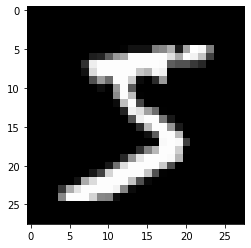

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

# The dataset contains images, each image of 28x28 px. 
# There are 60.000 images in training data and 10.000 images in test data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Overview of the dataset

print(f'Shape of the training data: {x_train.shape}')
print(f'Shape of the training target: {y_train.shape}')
print(f'Shape of the test data: {x_test.shape}')
print(f'Shape of the test target: {y_test.shape}')

print(y_train)

# Let's plot the first image in the training data and look at it's 
# corresponding target (y) variable.
plt.imshow(x_train[0], cmap='gray')
print(f'Target variable is {y_train[0]}')

In the following lines of code we reshape the data to feed in the Model. <br>
You can see the data reshaped to (60000, 28, 28, 1):
- 60000 is the number of images, 
- 28, 28 is the shape of image 
- 1 is the number of channels in the image: grayscale images have 1 channel, colored images have 3 channels

The next step is **Normalizing** i.e. scaling the pixels to 0-1 from 0-255.

In [3]:
# Reshaping the data

x_train = x_train.reshape(60000, 28, 28, 1)

x_test = x_test.reshape(10000, 28, 28, 1)

# Normalizing
x_train = x_train/255
x_test = x_test/255


Let's look at details of the model:

- The 3x3 pixel kernel reduces the image size by 1 pixel on every size because it can't process the pixels at the edges and the 64 types of filter outputs 64 layers of matrix converting to a output of (26, 26, 64).<br>
- The Max Pooling of pool size 2x2 reduces the image by half (output shape is (13, 13, 64)).<br>
- The next layers are again a convolution and max pooling with the net output of shape (5, 5, 64).<br>
- The flatten layer unrolls the input to a single dimension array i.e. 5 x 5 x 64 = 1600. <br>
- The number of nodes in the next layer is fixed by us to 128. <br>
- Final output layer contains 10 nodes for 10 classes.<br>

The **model.summary()** method will return quick overview of the components of your Keras model. <br>

You can also create a plot of your model by calling the **plot_model()** function. This will create an image file that contains a box and line diagram of the layers in your model.<br>

**Note**: the more trainable parameters your model has (a value you get from the summary), the more computing power you need, furthermore with to many trainable parameters, your model is more vulnerable to overfitting.

**Note**: **tf.keras.layers.Flatten()** flattens the input.<br>
For input of (batch_size, height, width) the output converts to (batch_size, height\*width)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

### Training the model

The **model.fit()** method trains the model. It gets the following arguments:

- **x_train**: Training data/features
- **y_train**: Target
- **epochs**: Number of times the entire dataset is fed in the model. The number of epochs are a kind of try and test metrics. It depends on a number of factors like size of data and complexity of classification, etc. You will slowly get a feeling of how to estimate number of epochs required for a particular model and dataset.

While training you can see the **loss** and **accuracy** calculated on the training data itself. 

### Validating the model

During the training phase, we do see the accuracy level. This accuracy is calculated on the same data on which the model is trained. <br>
To validate the model we should check it's accuracy when it gets new data on which it is not trained.<br>
The **model.evaluate()** method is used for this test.<br>
If the model gives high accuracy on training data but low accuracy on test data it is **overfitting**. 


In [6]:
# Training
model.fit(x_train, y_train, epochs=2)

# Validation
val_loss, val_acc = model.evaluate(x_test, y_test)

print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_acc}')

Epoch 1/2
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1254 - accuracy: 0.9618
Epoch 2/2
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0416 - accuracy: 0.9865


313/313 [==============================] - 2s 8ms/step - loss: 0.0374 - accuracy: 0.9875
Validation loss: 0.0374450646340847
Validation accuracy: 0.987500011920929


## How to Save and Load Your Model

After having trained and evaluated a model we may want to re-use it later without retraining it each time.<br>

This can be achieved by saving the model to file and later loading it and using it to make predictions.<br>

This can be achieved using the **save()** method on the model to save the model.<br>

`model.save('CNNMinistModel.h5')`

It can be loaded later using the **load_model()** function.<br>

`from tensorflow.keras.models import load_model
model = load_model('CNNMinistModel.h5')`

<br>
The model is saved in **H5 format**, an efficient array storage format. As such, you must ensure that the `h5py` library is installed :

`pip install h5py`

or

`conda install h5py`



## Early Stopping

Neural networks are challenging to train: too little training and the model underfits; too much training and the model overfits the training dataset.<br>Both cases result in a model that is less effective than it could be.

<br>
One approach to solving this problem is to use **early stopping**. This involves monitoring the loss on the training dataset and a validation dataset. As soon as loss for the validation set starts to show signs of overfitting, the training process can be stopped.<br>

To use **early stopping**, first you need a validation dataset. You can define the validation dataset manually via the **validation_data** argument to the `fit()` method, or you can use the **validation_split** argument and specify the amount of the training dataset to hold back for validation.<br>

You can then define an **EarlyStopping** instance and instruct it on which performance measure to monitor, such as **val_loss** for loss on the validation dataset.<br>
Training will stop when the chosen performance measure stops improving. To discover the training epoch on which training was stopped, the **verbose** argument can be set to 1. <br>

Often, the first sign of no further improvement may not be the best time to stop training. This is because the model may coast into a plateau of no improvement or even get slightly worse before getting much better.<br>

We can account for this by adding a delay to the trigger in terms of the number of epochs on which we would like to see no improvement. This can be done by setting the **patience** argument.<br>

This `EarlyStopping` object can then be provided to the `fit()` method via the **callbacks** argument.<br>
This allows you to set the number of epochs to a large number and be confident that training will end as soon as the model starts overfitting.<br> 

The `EarlyStopping` callback will stop training once triggered, but the model at the end of training may not be the model with best performance on the validation dataset.<br>

An additional callback is required that will save the best model observed during training for later use. This is the **ModelCheckpoint** callback.<br>

The **ModelCheckpoint** can be used to save the best model observed during training as defined by a chosen performance measure on the validation dataset.<br>



In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss')

# Training
model.fit(x_train, y_train, epochs=500, validation_split=0.3, callbacks=[es, mc])

# Validation
results = model.evaluate(x_test, y_test)

Epoch 1/10
1313/1313 [==============================] - 95s 72ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0381 - val_accuracy: 0.9893
Epoch 2/10
1313/1313 [==============================] - 93s 71ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0374 - val_accuracy: 0.9902
Epoch 3/10
  58/1313 [>.............................] - ETA: 1:20 - loss: 0.0109 - accuracy: 0.9973

KeyboardInterrupt: 